In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image,ImageDraw
import PIL
import shutil,os,sys
import glob
from time import sleep

In [2]:
import argparse
import pyscreenshot as ImageGrab
from matplotlib import pyplot as plt 
import time

In [3]:
import pywt
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

# 特徵分類(function)

In [4]:
#建立訓練資料
#建立資料夾(刪掉重建)
def emptydir(dirname):
    if os.path.isdir(dirname):
        #資料夾存在就刪除
        shutil.rmtree(dirname)
        #延遲處理
        sleep(2)
    #建立資料夾
    os.mkdir(dirname)

## 單一圖片改大小(function)

In [5]:
#單改一張
def ChangeSize(ffilename):
        img=Image.open(filename)
        #尺寸轉換200x200
        img_new=img.resize((500,500),PIL.Image.ANTIALIAS)
        img_new.save('Screen/transport/'+filename.split("/")[-1] )

## 批次圖片改大小(function)

In [6]:
#轉換尺寸
def dirResize(src,dst):
    #讀取資料夾中所有jpg
    #myfiles=get_all
    myfiles=glob.glob(src+'/*.JPG')
    emptydir(dst)
    print(src+'資料夾')
    print('Start')
    #逐一將檔案轉換尺吋
    for i,f in enumerate(myfiles):
        img=Image.open(f)
        #尺寸轉換200x200
        img_new=img.resize((500,500),PIL.Image.ANTIALIAS)
        #批次從000~100(0>3d)的檔名.jpg
        outname=str("scan")+str('{:0>3d}').format(i+1)+'.jpg'
        img_new.save(dst+'/'+outname)
    print('End \n')

In [24]:
#dirResize("Haar-Training-Plate-cut2/training/picMark","Haar-Training-Plate-cut2/training/p")

Haar-Training-Plate-cut2/training/picMark資料夾
Start
End 



In [81]:
#分類器resize
#resize正樣本到200*200大小
#(讀進、另外寫入)
#正向樣本
dirResize('postive','carpost')
#負向樣本
dirResize('negtive','carnegt')

postive資料夾
Start
End 

negtive資料夾
Start
End 



In [136]:
dirResize('cutImage','Haar-Training-Plate-cut/training/positive/rawdata')

cutImage資料夾
Start
End 



In [137]:
#jpg轉換成bmp格式
#從carplate中將原始檔案jpg轉bmp後刪除
filename="Haar-Training-Plate-cut/training/positive/rawdata"
myfiles=glob.glob(filename+"/*.jpg")
print('Start bmp')
#處理前目錄檔案
print(os.listdir(filename))
for f in myfiles:
    namespilt=f.split("\\")
    img=Image.open(f)
    #置換檔名
    outname=namespilt[1].replace('rrjpg','bmpraw')
    #置換副檔名
    outname=outname.replace('.jpg','.bmp')
    #存為bmp
    img.save(filename+'/'+outname,'bmp')
    #刪除原始檔案
    os.remove(f)
print('end')
#處理後目錄檔案
print(os.listdir(filename))
print(os.walk(filename))
print(os.walk)

Start bmp
['rrjpg010.jpg', 'rrjpg011.jpg', 'rrjpg012.jpg', 'rrjpg013.jpg', 'rrjpg014.jpg', 'rrjpg015.jpg', 'rrjpg016.jpg', 'rrjpg017.jpg', 'rrjpg018.jpg', 'rrjpg019.jpg', 'rrjpg020.jpg', 'rrjpg021.jpg', 'rrjpg022.jpg', 'rrjpg023.jpg', 'rrjpg024.jpg', 'rrjpg025.jpg', 'rrjpg026.jpg', 'rrjpg027.jpg', 'rrjpg028.jpg', 'rrjpg029.jpg', 'rrjpg030.jpg', 'rrjpg031.jpg', 'rrjpg032.jpg', 'rrjpg033.jpg', 'rrjpg034.jpg', 'rrjpg035.jpg', 'rrjpg036.jpg', 'rrjpg037.jpg', 'rrjpg038.jpg', 'rrjpg039.jpg', 'rrjpg040.jpg', 'rrjpg041.jpg', 'rrjpg042.jpg', 'rrjpg043.jpg', 'rrjpg044.jpg', 'rrjpg045.jpg', 'rrjpg046.jpg', 'rrjpg047.jpg', 'rrjpg048.jpg', 'rrjpg049.jpg', 'rrjpg050.jpg', 'rrjpg051.jpg', 'rrjpg052.jpg', 'rrjpg053.jpg', 'rrjpg054.jpg', 'rrjpg055.jpg', 'rrjpg056.jpg', 'rrjpg057.jpg', 'rrjpg058.jpg', 'rrjpg059.jpg', 'rrjpg060.jpg', 'rrjpg061.jpg', 'rrjpg062.jpg', 'rrjpg063.jpg', 'rrjpg064.jpg', 'rrjpg065.jpg', 'rrjpg066.jpg', 'rrjpg067.jpg', 'rrjpg068.jpg', 'rrjpg069.jpg', 'rrjpg070.jpg', 'rrjpg071.jpg

In [138]:
#標記負樣本
#open()，w寫入，r讀取，x新建立
#寫入標記txt
fp=open('Haar-Training-Plate-cut/training/negative/bg.txt','w')
#讀出根目錄檔案
files=glob.glob("Haar-Training-Plate-cut/training/negative/*.jpg")
print('寫入bg.txt')
text=""
for file in files:
    #取檔名
    basename=os.path.basename(file)
    filename="negative/"+basename
    text+=filename+"\n"
    
print(text)
fp.write(text)
fp.close()
print('完成bg.txt')

寫入bg.txt
negative/negGray001.jpg
negative/negGray002.jpg
negative/negGray003.jpg
negative/negGray004.jpg
negative/negGray005.jpg
negative/negGray006.jpg
negative/negGray007.jpg
negative/negGray008.jpg
negative/negGray009.jpg
negative/negGray010.jpg
negative/negGray011.jpg
negative/negGray012.jpg
negative/negGray013.jpg
negative/negGray014.jpg
negative/negGray015.jpg
negative/negGray016.jpg
negative/negGray017.jpg
negative/negGray018.jpg
negative/negGray019.jpg
negative/negGray020.jpg
negative/negGray021.jpg
negative/negGray022.jpg
negative/negGray023.jpg
negative/negGray024.jpg
negative/negGray025.jpg
negative/negGray026.jpg
negative/negGray027.jpg
negative/negGray028.jpg
negative/negGray029.jpg
negative/negGray030.jpg
negative/negGray031.jpg
negative/negGray032.jpg
negative/negGray033.jpg
negative/negGray034.jpg
negative/negGray035.jpg
negative/negGray036.jpg
negative/negGray037.jpg
negative/negGray038.jpg
negative/negGray039.jpg
negative/negGray040.jpg
negative/negGray041.jpg
negativ

## 統計檔案數量(function)

In [7]:
#統計檔案數量
def CountPostive(filename):
    #取路徑
    path = os.getcwd() 
    print (path)
    #正向樣本
    num_files=0
    for fn in os.listdir(filename):
            num_files += 1
    print (num_files)

### 標記圖案

In [17]:
#顯示前面手動標區的標框
#open()，r讀取
path='C:/Users/2102048/pythonCV/Haar-Training-Plate-cut2/training/picMark'
fplabel=open('Haar-Training-Plate-cut2/training/positive/info.txt','r')
lines=fplabel.readlines()
emptydir('picMark')
print('Start繪製方框')
for line in lines:
    #一個array讀取所有筆數
    data=line.split(' ')
    #C:\Users\2102048\pythonCV\Haar-Training-Plate-cut\training\positive
    img=Image.open('Haar-Training-Plate-cut2/training/positive/'+data[0])
    draw=ImageDraw.Draw(img)
    #方框數量
    n=data[1]
    #繪製方框
    for i in range(int(n)):
        x=int(data[2+i*4])
        y=int(data[3+i*4])
        w=int(data[4+i*4])
        h=int(data[5+i*4])
        draw.rectangle((x,y,x+w,y+h),outline='red')
    filename=(data[0].split('/'))[-1]
    #存檔路徑
    img.save('Haar-Training-Plate-cut2/training/picMark/'+filename)
fplabel.close()
print('End繪製結束')
CountPostive(path)

Start繪製方框
End繪製結束
C:\Users\2102048\pythonCV
30


#### 修改samples_creation.bat(執行並產生向量檔)
#### 修改 haarTraining.bat(執行並開始訓練)

In [107]:
#打包分類器(產生facevector.vec向量檔)
#info 正樣本標記檔路徑
#vec向量檔路徑
#num正向樣本圖片數量
#w 偵測物件寬度
#h偵測物件高度

#在資料夾下新建samples_creation.bat，批處理檔案
#opencv_createsamples.exe -info positive/info.txt -vec vector/facevector.vec -num 497 -w 76 -h 20

In [108]:
#訓練(產生訓練檔案)
#data 儲存訓練完的結果路徑
#vec 正向樣本向量檔
#bg 負向樣本檔路徑
#numPos 正向樣本數量
#numNeg 負向樣本數量
#numStage 訓練級數(等級15~25)
#minHitRate 每一個訓練及數所需要命中的次數
#precalcValBufSize 配置訓練記憶體大小
#precalcIdxBufSize 訓練使用記憶體大小
#model 訓練的模型 ALL(所有) BASIC(線性) CORE(線性+中心)
#w 偵測物件的寬
#h 偵測物件的高
# opencv_traincascade.exe -data cascades -vec vector/facevector.vec -bg negative/bg.txt -numPos 497 -numNeg 293 -numStages 15 -w 76 -h 20 -minHitRate 0.9999 -precalcValBufSize 3000 -precalcIdxBufSize 3000 -mode ALL

## 轉檔按PNG轉JPG處理(非必要function)

In [8]:
#轉檔按PNG轉JPG處理(非必要)
#目前目錄
print(os.getcwd())
#讀取目錄
def TransportFile(path,newpath):
    print("Start   "+path)
    for filename in os.listdir(path):
        #取檔名
        if os.path.splitext(filename)[1]=='.png':
            print("原檔"+os.path.splitext(filename)[0]+os.path.splitext(filename)[1])
            img=cv2.imread(path+filename)
            print("改為"+filename.replace(".png",".jpg"))
            newfilename=filename.replace(".png",".jpg")
            #另存另一個資料夾
            #imwrite(檔名,圖檔)
            cv2.imwrite(newpath+newfilename,img)
    print("End")

path = "ImageProject\\"
newpath="realPlate\\"
TransportFile(path,newpath)


C:\Users\2102048\pythonCV
Start   ImageProject\
原檔1603405470.4757953.png
改為1603405470.4757953.jpg
原檔1603405498.5524812.png
改為1603405498.5524812.jpg
原檔1603405523.5579.png
改為1603405523.5579.jpg
原檔1603405551.6733685.png
改為1603405551.6733685.jpg
原檔1603405554.8005126.png
改為1603405554.8005126.jpg
原檔1603405564.165499.png
改為1603405564.165499.jpg
原檔1603405807.3064497.png
改為1603405807.3064497.jpg
原檔1603408732.652614.png
改為1603408732.652614.jpg
原檔1603408955.2564344.png
改為1603408955.2564344.jpg
原檔1603409030.492751.png
改為1603409030.492751.jpg
End


## 截圖Function

In [9]:
#螢幕截圖function
#/////////測試截圖存檔///////////
#(路徑,檔案數,控制要不要執行)
def Scann_All(path,filename,switch):
    if(switch==True):
        #擷取全螢幕
        image=ImageGrab.grab()
        #存檔
        #path='Screen\\'
        outname=str("scan")+filename+'.jpg'
        print('截圖存檔'+outname)
        image.save(path+outname)
    else:
         None

In [10]:
#框區域截圖function
#/////////測試截圖存檔///////////
def Scann_Aera(path,filename,switch,x1,y1,x2,y2):
    if(switch==True):
        #0,0,500,500
        image=ImageGrab.grab(bbox=(x1,y1,x2,y2))

        #存檔
        #path='Screen\\'
        outname=str("scan")+filename+'.jpg'
        print('截圖存檔'+outname)
        image.save(path+outname)
    else:
         None

## 讀取影片

In [15]:
cap = cv2.VideoCapture('x-ray/2021-02-19 11-29-36  T111043BA.mp4')
print("Start")
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Eed")
        break
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) == ord('q'):
        print("Eed")
        break
cap.release()
cv2.destroyAllWindows()

Start
Eed


## 影片偵測物件

In [11]:
cap = cv2.VideoCapture('x-ray/2021-02-19 11-29-36  T111043BA.mp4')
#截圖計數
i=0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("end")
        break
    #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #判斷要不要截圖
    switch=0
    filename=str('{:0>3d}').format(i+1)
    #/////////測試比對///////
    ComparisonFile=str('{:0>3d}').format(i-1)
    cv2.imshow('frame', frame)
    #///////////////
    #img = cv2.imread(file)
    #設讀取路徑
    detector = cv2.CascadeClassifier('Haar-Training-Plate-cut/training/Cascade_cut_Center.xml')
    ####Test另一個
    detector2 = cv2.CascadeClassifier('Haar-Training-Plate-cut2/training/Cascade_cut_Upperleft.xml')
    signs = detector.detectMultiScale(frame, minSize=(4, 4), scaleFactor=1.1, minNeighbors=4)
    ####Test另一個
    signs2 = detector2.detectMultiScale(frame, minSize=(20, 24), scaleFactor=1.1, minNeighbors=4)
    if  len(signs)>0 and len(signs2)>0:
        for (x, y, w, h) in signs:          
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
            print(signs)
        for (x2,y2,w2,h2) in signs2:
            cv2.rectangle(frame, (x2, y2), (x2+w2, y2+h2), (0, 0, 0), 2)
            print(signs2)
        switch=1
        i=i+1

    elif len(signs)>0:
        for (x, y, w, h) in signs:          
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            print(signs)
    elif len(signs2)>0:
        for (x2,y2,w2,h2) in signs2:
                cv2.rectangle(img, (x2, y2), (x2+w2, y2+h2), (0, 0, 0), 2)
                print(signs2)
    #else:
        #print('沒有偵測！')
    '''
    cv2.imshow('Frame', img)
    key1 = cv2.waitKey(10)
    '''
    
    '''
    key = cv2.waitKey(0)
    cv2.destroyAllWindows()
    if key == 113 or key==81:  #按 q 鍵結束
        break
    '''
    #截圖測試
    path='Screen\\'
    Scann_Aera(path,filename,switch,100,250,650,720)
    
    #比對測試
    #C_rate=Comparison(filename,ComparisonFile)
    #print(C_rate)
    #//////////////
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[[246 498  32  26]]
[[658 225 235 196]]
截圖存檔scan001.jpg
[[246 498  32  26]]
[[658 225 235 196]]
截圖存檔scan002.jpg
[[246 498  32  26]]
[[658 225 235 196]]
截圖存檔scan003.jpg
[[246 498  32  26]]
[[658 225 235 196]]
截圖存檔scan004.jpg
[[246 498  32  26]]
[[658 225 235 196]]
截圖存檔scan005.jpg
[[ 237  462   38   30]
 [ 455  454   54   43]
 [ 809  455   47   37]
 [1042  466   31   24]]
[[ 237  462   38   30]
 [ 455  454   54   43]
 [ 809  455   47   37]
 [1042  466   31   24]]
[[ 237  462   38   30]
 [ 455  454   54   43]
 [ 809  455   47   37]
 [1042  466   31   24]]
[[ 237  462   38   30]
 [ 455  454   54   43]
 [ 809  455   47   37]
 [1042  466   31   24]]
[[669 230 223 186]]
截圖存檔scan006.jpg
[[ 237  462   38   30]
 [ 455  454   54   43]
 [ 811  456   47   37]
 [1042  466   31   24]]
[[ 237  462   38   30]
 [ 455  454   54   43]
 [ 811  456   47   37]
 [1042  466   31   24]]
[[ 237  462   38   30]
 [ 455  454   54   43]
 [ 811  456   47   37]
 [1042  466   31   24]]
[[ 237  462   38   30]
 [ 455  45

截圖存檔scan033.jpg
[[ 240  461   38   30]
 [ 814  458   42   34]
 [1036  460   38   30]]
[[ 240  461   38   30]
 [ 814  458   42   34]
 [1036  460   38   30]]
[[ 240  461   38   30]
 [ 814  458   42   34]
 [1036  460   38   30]]
[[667 217 236 197]]
截圖存檔scan034.jpg
[[ 240  461   38   30]
 [ 814  458   42   34]
 [1034  460   39   31]]
[[ 240  461   38   30]
 [ 814  458   42   34]
 [1034  460   39   31]]
[[ 240  461   38   30]
 [ 814  458   42   34]
 [1034  460   39   31]]
[[666 218 236 197]]
截圖存檔scan035.jpg
[[ 241  461   38   30]
 [ 814  458   42   34]
 [1034  460   39   31]]
[[ 241  461   38   30]
 [ 814  458   42   34]
 [1034  460   39   31]]
[[ 241  461   38   30]
 [ 814  458   42   34]
 [1034  460   39   31]]
[[667 219 234 195]]
截圖存檔scan036.jpg
[[ 239  460   39   31]
 [ 814  458   42   34]
 [1035  460   38   30]]
[[ 239  460   39   31]
 [ 814  458   42   34]
 [1035  460   38   30]]
[[ 239  460   39   31]
 [ 814  458   42   34]
 [1035  460   38   30]]
[[667 218 235 196]]
截圖存檔scan037.jpg


截圖存檔scan068.jpg
[[ 814  458   42   34]
 [1037  462   36   29]]
[[ 814  458   42   34]
 [1037  462   36   29]]
[[667 219 233 194]]
截圖存檔scan069.jpg
[[ 814  458   42   34]
 [1036  461   37   29]]
[[ 814  458   42   34]
 [1036  461   37   29]]
[[666 220 234 195]]
截圖存檔scan070.jpg
[[ 814  458   42   34]
 [1037  462   36   29]]
[[ 814  458   42   34]
 [1037  462   36   29]]
[[667 219 233 195]]
截圖存檔scan071.jpg
[[ 814  458   42   34]
 [1036  461   37   29]]
[[ 814  458   42   34]
 [1036  461   37   29]]
[[668 225 228 190]]
截圖存檔scan072.jpg
[[ 814  458   42   34]
 [1035  461   37   30]
 [ 246  464   34   26]]
[[ 814  458   42   34]
 [1035  461   37   30]
 [ 246  464   34   26]]
[[ 814  458   42   34]
 [1035  461   37   30]
 [ 246  464   34   26]]
[[669 227 227 189]]
截圖存檔scan073.jpg
[[ 814  458   42   34]
 [1034  461   39   31]
 [ 246  464   34   26]]
[[ 814  458   42   34]
 [1034  461   39   31]
 [ 246  464   34   26]]
[[ 814  458   42   34]
 [1034  461   39   31]
 [ 246  464   34   26]]
[[669 22

截圖存檔scan103.jpg
[[ 238  459   41   33]
 [ 814  458   42   34]
 [1036  461   38   30]]
[[ 238  459   41   33]
 [ 814  458   42   34]
 [1036  461   38   30]]
[[ 238  459   41   33]
 [ 814  458   42   34]
 [1036  461   38   30]]
[[668 220 230 192]]
截圖存檔scan104.jpg
[[ 238  459   41   33]
 [ 814  457   43   35]
 [1035  461   39   31]]
[[ 238  459   41   33]
 [ 814  457   43   35]
 [1035  461   39   31]]
[[ 238  459   41   33]
 [ 814  457   43   35]
 [1035  461   39   31]]
[[668 219 232 193]]
截圖存檔scan105.jpg
[[ 239  460   39   31]
 [ 814  457   43   35]
 [1035  461   39   31]]
[[ 239  460   39   31]
 [ 814  457   43   35]
 [1035  461   39   31]]
[[ 239  460   39   31]
 [ 814  457   43   35]
 [1035  461   39   31]]
[[667 218 233 195]]
截圖存檔scan106.jpg
[[ 239  460   39   31]
 [ 815  457   43   35]
 [1035  461   39   31]]
[[ 239  460   39   31]
 [ 815  457   43   35]
 [1035  461   39   31]]
[[ 239  460   39   31]
 [ 815  457   43   35]
 [1035  461   39   31]]
[[667 219 235 196]]
截圖存檔scan107.jpg


截圖存檔scan137.jpg
[[ 238  460   41   32]
 [ 809  456   45   36]
 [1032  460   39   31]]
[[ 238  460   41   32]
 [ 809  456   45   36]
 [1032  460   39   31]]
[[ 238  460   41   32]
 [ 809  456   45   36]
 [1032  460   39   31]]
[[668 222 229 191]]
截圖存檔scan138.jpg
[[ 238  460   41   32]
 [ 809  456   45   36]
 [1030  459   40   32]]
[[ 238  460   41   32]
 [ 809  456   45   36]
 [1030  459   40   32]]
[[ 238  460   41   32]
 [ 809  456   45   36]
 [1030  459   40   32]]
[[669 225 227 189]]
截圖存檔scan139.jpg
[[ 815  458   41   33]
 [1036  461   36   29]]
[[ 815  458   41   33]
 [1036  461   36   29]]
[[666 221 232 193]]
截圖存檔scan140.jpg
[[ 815  458   41   33]
 [1037  462   36   28]]
[[ 815  458   41   33]
 [1037  462   36   28]]
[[666 218 234 195]]
截圖存檔scan141.jpg
[[ 814  458   40   32]
 [1037  462   36   28]]
[[ 814  458   40   32]
 [1037  462   36   28]]
[[668 225 227 190]]
截圖存檔scan142.jpg
[[ 814  458   41   33]
 [1037  461   36   29]]
[[ 814  458   41   33]
 [1037  461   36   29]]
[[668 22

截圖存檔scan185.jpg
[[ 242  461   37   29]
 [ 811  458   42   34]
 [1028  459   41   32]]
[[ 242  461   37   29]
 [ 811  458   42   34]
 [1028  459   41   32]]
[[ 242  461   37   29]
 [ 811  458   42   34]
 [1028  459   41   32]]
[[669 227 226 189]]
截圖存檔scan186.jpg
[[ 242  461   37   29]
 [ 812  457   43   35]
 [1028  459   41   32]]
[[ 242  461   37   29]
 [ 812  457   43   35]
 [1028  459   41   32]]
[[ 242  461   37   29]
 [ 812  457   43   35]
 [1028  459   41   32]]
[[668 228 225 188]]
截圖存檔scan187.jpg
[[ 242  461   37   29]
 [ 811  458   42   34]
 [1028  459   41   32]]
[[ 242  461   37   29]
 [ 811  458   42   34]
 [1028  459   41   32]]
[[ 242  461   37   29]
 [ 811  458   42   34]
 [1028  459   41   32]]
[[669 226 227 189]]
截圖存檔scan188.jpg
[[ 241  461   38   30]
 [ 812  457   43   35]
 [1028  459   41   32]]
[[ 241  461   38   30]
 [ 812  457   43   35]
 [1028  459   41   32]]
[[ 241  461   38   30]
 [ 812  457   43   35]
 [1028  459   41   32]]
[[670 228 225 187]]
截圖存檔scan189.jpg


NameError: name 'img' is not defined

## 偵測圖像物件

In [6]:
#偵測物件
#讀進要偵測路徑
ObjFiles=glob.glob("real/*.jpg")
#截圖計數
i=0
for file in ObjFiles:
    #判斷要不要截圖
    switch=0
    filename=str('{:0>3d}').format(i+1)
    print('圖片檔案：' + file)
    img = cv2.imread(file)
    #設讀取路徑
    detector = cv2.CascadeClassifier('Haar-Training-Plate-cut/training/Cascade_cut_Center.xml')
    ####Test另一個
    detector2 = cv2.CascadeClassifier('Haar-Training-Plate-cut2/training/Cascade_cut_Upperleft.xml')
    signs = detector.detectMultiScale(img, minSize=(4, 4), scaleFactor=1.1, minNeighbors=4)
    ####Test另一個
    signs2 = detector2.detectMultiScale(img, minSize=(20, 24), scaleFactor=1.1, minNeighbors=4)
    if  len(signs)>0 and len(signs2)>0:
        for (x, y, w, h) in signs:          
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            print(signs)
        for (x2,y2,w2,h2) in signs2:
            cv2.rectangle(img, (x2, y2), (x2+w2, y2+h2), (0, 0, 0), 2)
            print(signs2)
        switch=1
        i=i+1
    elif len(signs)>0:
        for (x, y, w, h) in signs:          
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            print(signs)
    elif len(signs2)>0:
        for (x2,y2,w2,h2) in signs2:
                cv2.rectangle(img, (x2, y2), (x2+w2, y2+h2), (0, 0, 0), 2)
                print(signs2)
    else:
        print('沒有偵測！')
    
    cv2.imshow('Frame', img)
    key1 = cv2.waitKey(10)
    #截圖測試
    path='Screen\\'
    Scann_Aera(path,filename,switch,0,0,500,500)
    key = cv2.waitKey(0)
    cv2.destroyAllWindows()
    if key == 113 or key==81:  #按 q 鍵結束
        break

圖片檔案：real\1603405498.5524812.jpg
沒有偵測！
圖片檔案：real\1603405523.5579.jpg
沒有偵測！
圖片檔案：real\1603405554.8005126.jpg
沒有偵測！
圖片檔案：real\1603408732.652614.jpg
沒有偵測！
圖片檔案：real\1603408955.2564344.jpg
沒有偵測！
圖片檔案：real\bmpraw001.jpg
[[397 240  30  24]]
[[ 22  23 204 170]]
截圖存檔scan001.jpg
圖片檔案：real\bmpraw002.jpg
[[166 238  33  26]]
圖片檔案：real\bmpraw003.jpg
[[391 237  35  28]
 [179 237  31  24]]
[[391 237  35  28]
 [179 237  31  24]]
[[ 18  22 212 177]]
截圖存檔scan002.jpg
圖片檔案：real\bmpraw004.jpg
[[166 280  38  30]]


## 範本比對

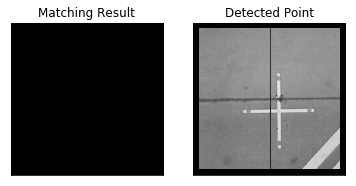

In [11]:
'''
#尋找最極值
minVal,maxVal,minLoc,maxLoc=cv2.minMaxLoc(src[,mask])
#尋找最小值
minVal,maxVal,minLoc,maxLoc=cv2.minMaxLoc(mathTemplate)
#左上角
#topLeft=minLoc
#右下角
bottomRight=(topLeft[0]+w,topLeft[1]+h)
#矩陣對角線
Line=cv.rectangle(img,pt1,pt2,color[,thickness])
#矩陣對角線使用(用到上面的左上、右下)
Line=cv.rectangle(img,topLeft,bottomRight,255,2)
'''
#///////測試前先清空  [pythonCV\Screen\transport]  ////////////
#img=cv2.imread('Screen/scan214.jpg',0)
#原圖
file='scan230.jpg'
filename='Screen/'+file
#統一尺吋function
ChangeSize(filename)
#原圖讀取
img=cv2.imread('Screen/transport/'+file,0)

#特徵
file='scan225.jpg'
filename='Screen/'+file
#統一尺吋function
ChangeSize(filename)
#特徵圖片讀取
template=cv2.imread('Screen/transport/'+file,0)

#比對
th,tw=template.shape[::-1]
rv=cv2.matchTemplate(img,template,cv2.TM_SQDIFF)
minVal,maxVal,minLoc,maxLoc=cv2.minMaxLoc(rv)
topLeft=minLoc
bottomRight=(topLeft[0]+tw,topLeft[1]+th)
cv2.rectangle(img,topLeft,bottomRight,30,40)
plt.subplot(121),plt.imshow(rv,cmap='gray')
plt.title('Matching Result'),plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap='gray')
plt.title('Detected Point'),plt.xticks([]),plt.yticks([])
plt.show()

(-0.5, 441.5, 423.5, -0.5)

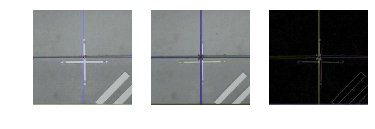

In [12]:
# 取得邊界(先腐蝕縮小，再用原圖去減)
compare=cv2.imread('Screen/scan214.jpg')
k=np.ones((5,5),np.uint8)
e=cv2.erode(compare,k,iterations = 1)
b=cv2.subtract(compare,e)

plt.subplot(131)
plt.imshow(compare)
plt.axis('off')
#腐蝕
plt.subplot(132)
plt.imshow(e)
plt.axis('off')
#原始減去腐蝕，獲得邊緣
plt.subplot(133)
plt.imshow(b)
plt.axis('off')





## 先膨脹，在去除  (2/26寫)

## 去除紅色

In [12]:
#原圖
imgs = cv2.imread("Screen/scan223.jpg")
#留下紅色
image = imgs.copy()
#去除紅色
images = imgs.copy()
print(image.shape)
rows, cols = image.shape[:2]
print(rows, cols)
#留下紅色
red_minus_blue = image[:, :, 2] - image[:, :, 0]
red_minus_green = image[:, :, 2] - image[:, :, 1]
 
red_minus_blue= red_minus_blue >= 20
red_minus_green = red_minus_green >= 20
 
red = image[:, :, 2] >= np.mean(image[:, :, 2])/2
 
mask = red_minus_green & red_minus_blue & red
print(mask)
#去除紅色
images[mask,:]=255
mask = (1-mask).astype(np.bool)
print(mask)
#留下紅色
image[mask, :] = 255

#取得時間改檔名
localtime = time.localtime()
resulttime = time.strftime("%Y-%m-%d_%M_%S", localtime)
#檔名流水號
i=0
outname=str(resulttime)+"_"+str('{:0>3d}').format(i+1)+'.jpg'

stack = np.vstack([imgs,image,images])

cv2.imwrite('Screen/transport/'+"2_"+outname,images)
while True:
    cv2.imshow("stack",images)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break


(466, 497, 3)
466 497
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


## 算距離測試

(-0.5, 441.5, 423.5, -0.5)

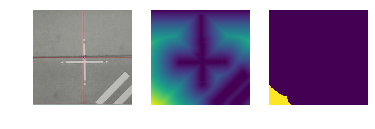

In [120]:
#算距離測試
img=cv2.imread('Screen/scan214.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
ishow=img.copy()
ret,thresh=cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#轉8 bit
kernel=np.ones((3,3),np.uint8)
opening=cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
#使用歐式距離
dist_transform=cv2.distanceTransform(opening,cv2.DIST_L2,5)
#print(dist_transform)
ret,fore=cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
plt.subplot(131)
plt.imshow(ishow)
plt.axis('off')

plt.subplot(132)
plt.imshow(dist_transform)
plt.axis('off')

plt.subplot(133)
plt.imshow(fore)
plt.axis('off')
